### Notebook to format cells for `cellChat` test

- **Developed by**: Carlos Talavera-López Ph.D
- **Institute of AI for Health - HelmholtzZentrum münchen**
- v211004

### Import required modules

In [1]:
import anndata
import numpy as np
import scipy as sp
import scanpy as sc
import pandas as pd
from geosketch import gs

### Setting up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 200, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.8.1
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

### Read heart global object 

In [5]:
adata = sc.read_h5ad('/Volumes/TIGERII/nobackup/ref_query_anotated.h5ad')
adata

AnnData object with n_obs × n_vars = 64812 × 1972
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue', 'batch2', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type', 'batch_join', 'cell_type_joint', 'source', 'source2', 'celltype', 'uncertainty', 'pred_celltype', 'evaluation', 'leiden', 'leiden_R', 'batch_union'
    var: 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable_nbatches-0', 'highly_variable_intersection-0', 'ENS-0-1'
    uns: 'celltype_colors', 'neighbors', 'source_colors', 'umap'
    obsm: 'X_cvae', 'X_umap'
    obsp: 'connectivities', 'distances'

In [6]:
adata_new = anndata.AnnData(X = adata.raw.X, obs = adata.obs, var = adata.raw.var, uns = adata.uns, obsm = adata.obsm, obsp = adata.obsp)
adata_new

AnnData object with n_obs × n_vars = 64812 × 10851
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue', 'batch2', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type', 'batch_join', 'cell_type_joint', 'source', 'source2', 'celltype', 'uncertainty', 'pred_celltype', 'evaluation', 'leiden', 'leiden_R', 'batch_union'
    uns: 'celltype_colors', 'neighbors', 'source_colors', 'umap'
    obsm: 'X_cvae', 'X_umap'
    obsp: 'connectivities', 'distances'

### Plot manifold

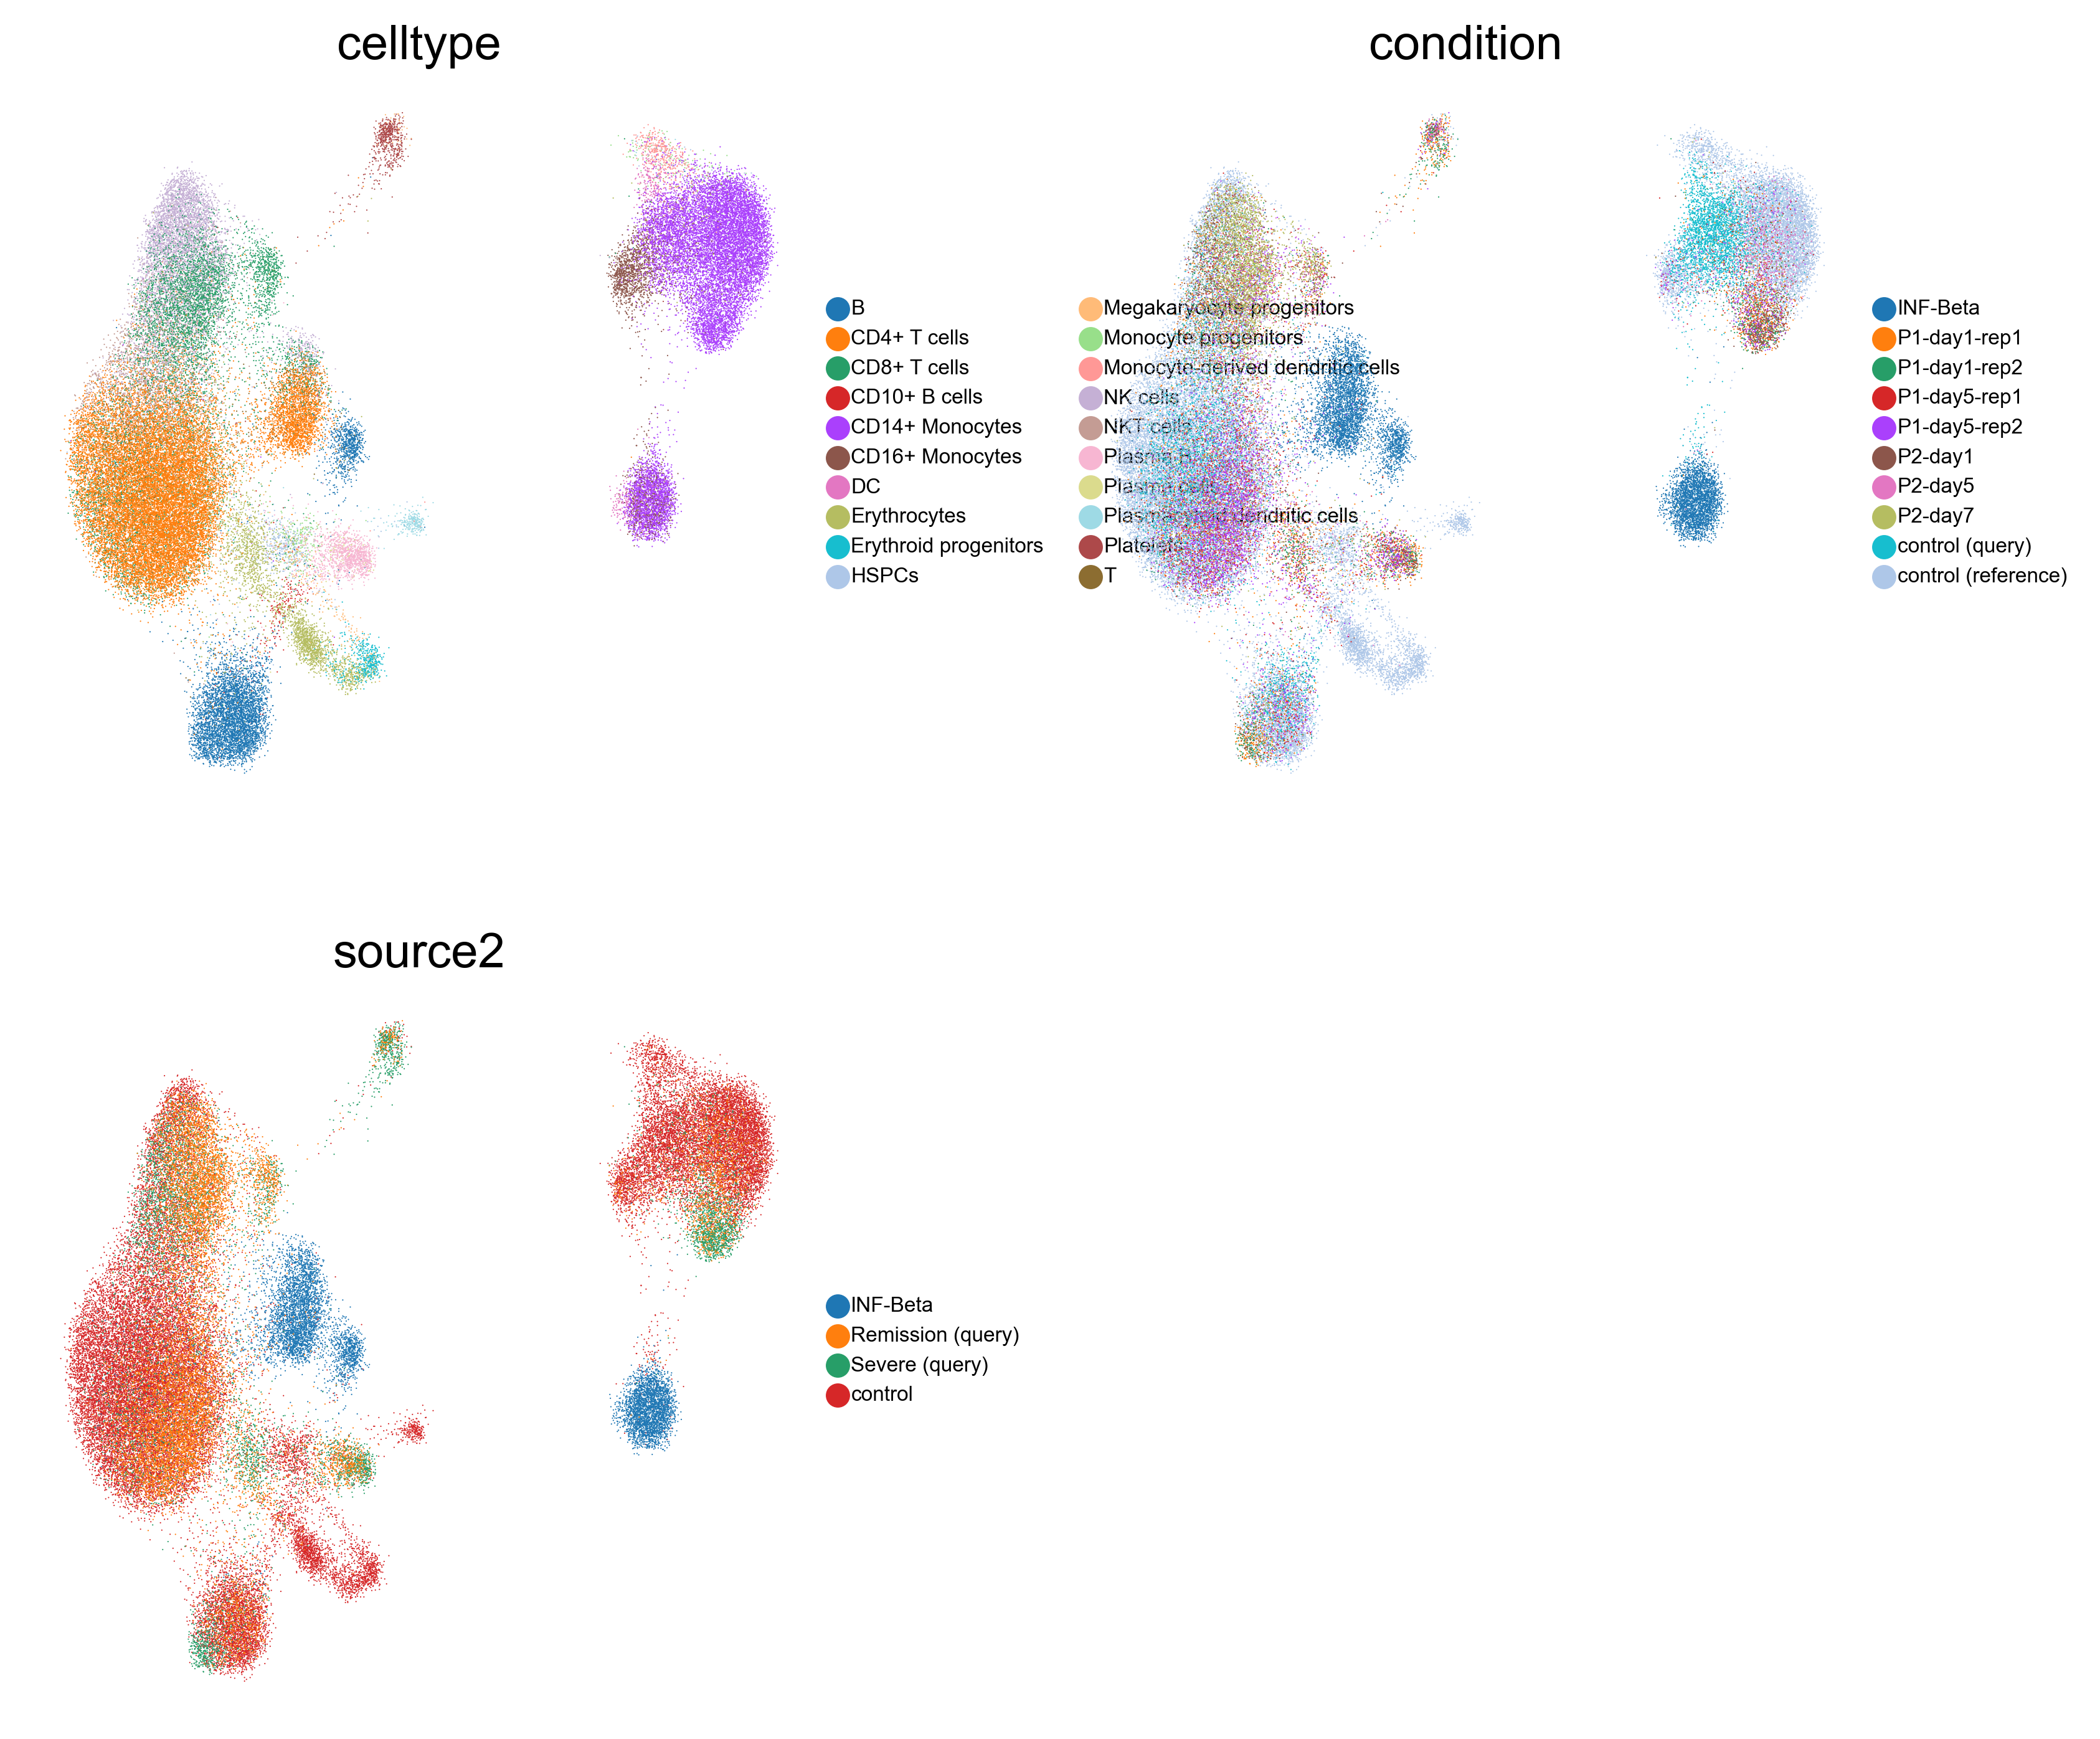

In [8]:
sc.pl.umap(adata_new, color = ['celltype', 'condition', 'source2'], color_map = 'RdPu', frameon = False, legend_fontsize = 6, size = 0.6, use_raw = False, save = '_COVID_Kang_condition.png', ncols = 2)

         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:01:08)
Storing dendrogram info using `.uns['dendrogram_source2']`


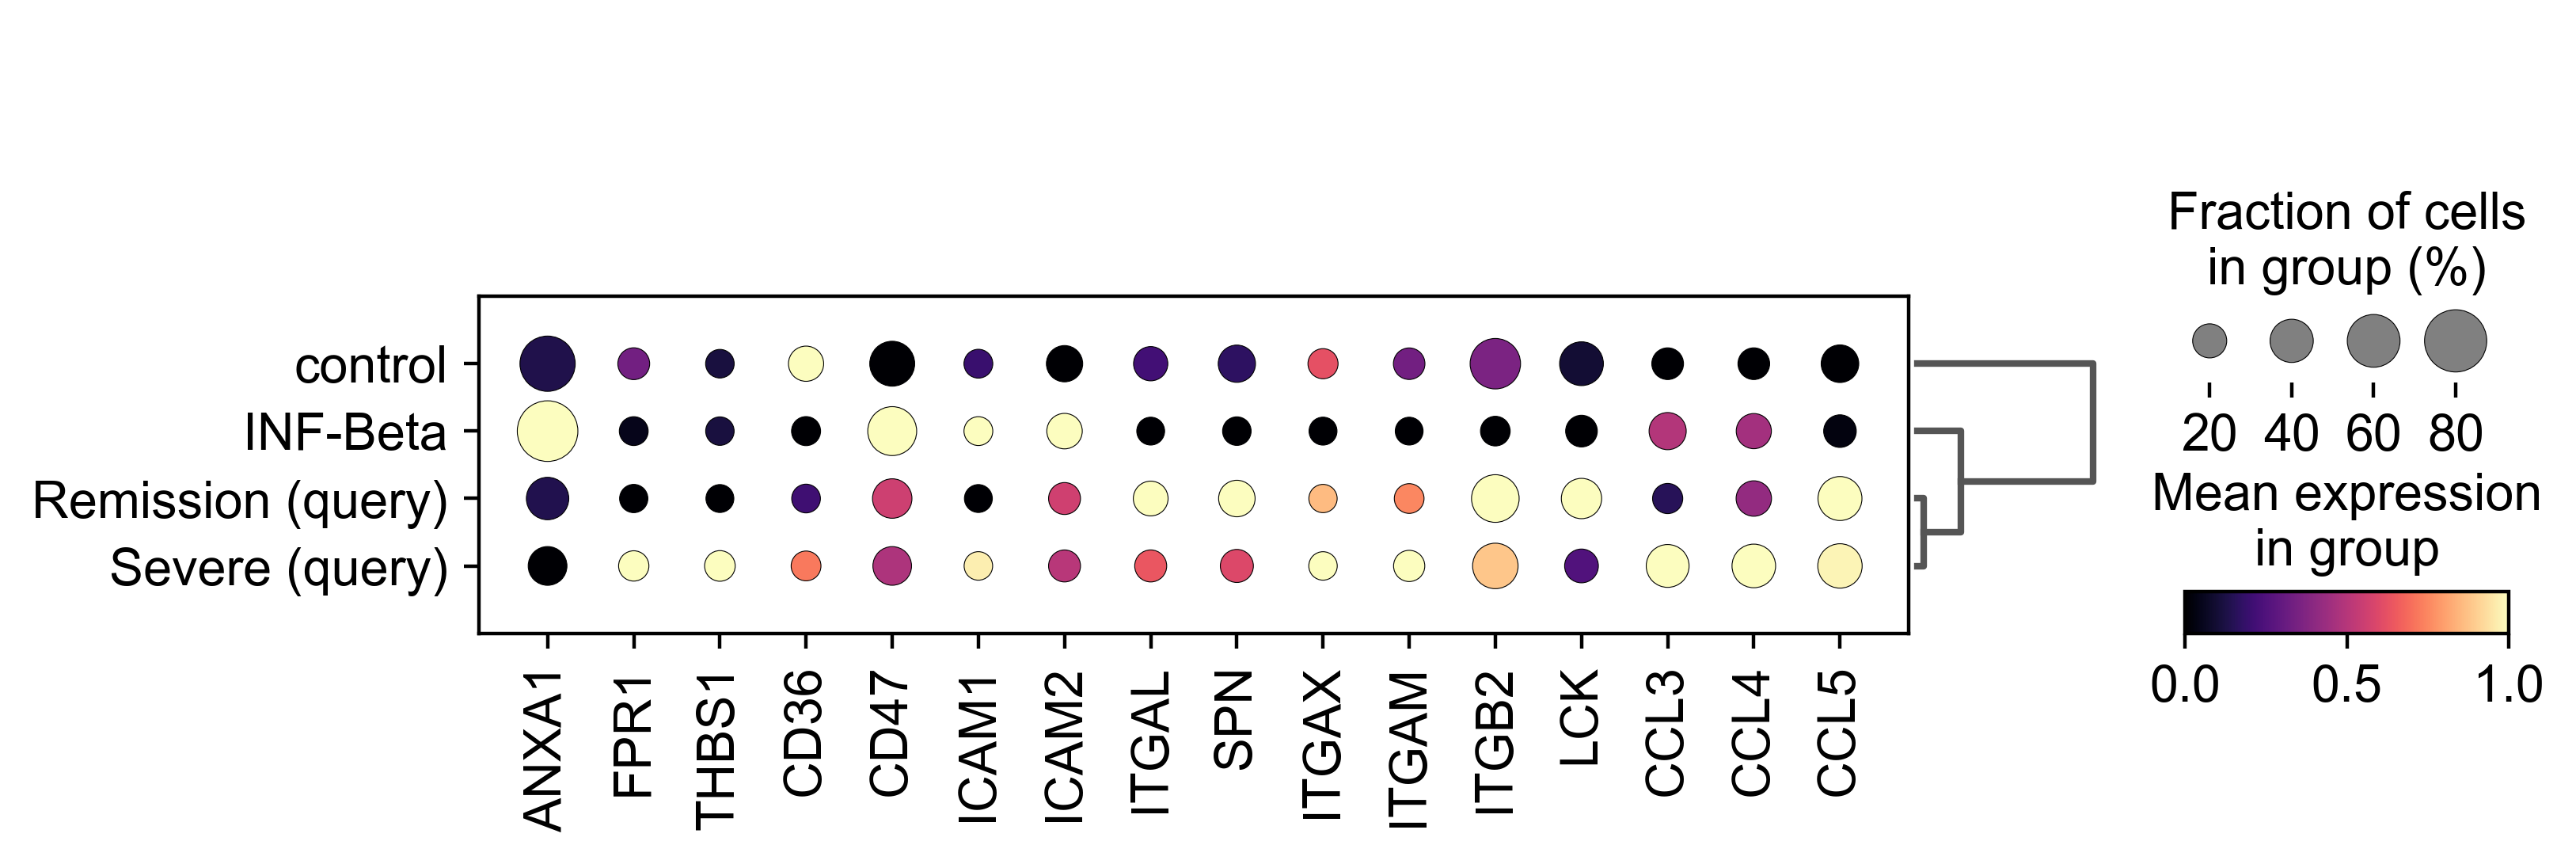

In [6]:
CCI = ['ANXA1', 'FPR1', 'THBS1', 'CD36', 'CD47', 'ICAM1', 'ICAM2', 'ITGAL', 'SPN', 'ITGAX', 'ITGAM', 'ITGB2', 'LCK', 'CCL3', 'CCL4', 'CCL5']
sc.pl.dotplot(adata_new, CCI, groupby = 'source2', dendrogram = True, standard_scale = 'var', smallest_dot = 40, color_map = 'magma', save = '_COVID-Kang_CCI_pathways.png')

### Make a subset of all populations

- Removing stuff like `nan`or doublets.

In [9]:
adata_new.obs['celltype'].cat.categories

Index(['B', 'CD4+ T cells', 'CD8+ T cells', 'CD10+ B cells', 'CD14+ Monocytes',
       'CD16+ Monocytes', 'DC', 'Erythrocytes', 'Erythroid progenitors',
       'HSPCs', 'Megakaryocyte progenitors', 'Monocyte progenitors',
       'Monocyte-derived dendritic cells', 'NK cells', 'NKT cells', 'Plasma B',
       'Plasma cells', 'Plasmacytoid dendritic cells', 'Platelets', 'T'],
      dtype='object')

In [10]:
adata_new.obs_names

Index(['AAACCTGCAGCGAACA-1-Oetjen_A-0-0', 'AAACCTGCATGTCCTC-1-Oetjen_A-0-0',
       'AAACCTGGTCGACTGC-1-Oetjen_A-0-0', 'AAACCTGGTCGCTTCT-1-Oetjen_A-0-0',
       'AAACCTGTCCCGACTT-1-Oetjen_A-0-0', 'AAACGGGAGGGCACTA-1-Oetjen_A-0-0',
       'AAACGGGAGTTAACGA-1-Oetjen_A-0-0', 'AAACGGGCACCTCGGA-1-Oetjen_A-0-0',
       'AAACGGGCACGGATAG-1-Oetjen_A-0-0', 'AAACGGGCACGTGAGA-1-Oetjen_A-0-0',
       ...
       'TTTGTCAAGAATTGTG-7-0-1-1', 'TTTGTCAAGCCACGCT-7-0-1-1',
       'TTTGTCAAGGATATAC-7-0-1-1', 'TTTGTCACAAGGTGTG-7-0-1-1',
       'TTTGTCACATACTACG-7-0-1-1', 'TTTGTCAGTCATACTG-7-0-1-1',
       'TTTGTCAGTTAAGGGC-7-0-1-1', 'TTTGTCAGTTACAGAA-7-0-1-1',
       'TTTGTCAGTTCCGGCA-7-0-1-1', 'TTTGTCATCAGAGACG-7-0-1-1'],
      dtype='object', length=64812)

In [11]:
adata_new.var_names

Index(['A1BG', 'A1BG-AS1', 'A2M', 'AAAS', 'AACS', 'AAGAB', 'AAK1', 'AAMP',
       'AARS', 'AARS2',
       ...
       'ZSWIM7', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11B',
       'ZYX', 'ZZEF1'],
      dtype='object', length=10851)

### Subset per condition

In [12]:
adata_new.obs['condition'].cat.categories

Index(['INF-Beta', 'P1-day1-rep1', 'P1-day1-rep2', 'P1-day5-rep1',
       'P1-day5-rep2', 'P2-day1', 'P2-day5', 'P2-day7', 'control (query)',
       'control (reference)'],
      dtype='object')

In [13]:
adata_new_CTRL = adata_new[adata_new.obs['condition'].isin(['control (query)','control (reference)'])]
adata_new_CTRL

View of AnnData object with n_obs × n_vars = 38843 × 10851
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue', 'batch2', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type', 'batch_join', 'cell_type_joint', 'source', 'source2', 'celltype', 'uncertainty', 'pred_celltype', 'evaluation', 'leiden', 'leiden_R', 'batch_union'
    uns: 'celltype_colors', 'neighbors', 'source_colors', 'umap', 'condition_colors', 'source2_colors'
    obsm: 'X_cvae', 'X_umap'
    obsp: 'connectivities', 'distances'

### Subset data with `geosketch`

### Export CTRL

In [14]:
sc.pp.normalize_per_cell(adata_new_CTRL, counts_per_cell_after = 1e6)
sc.pp.log1p(adata_new_CTRL)
adata_new_CTRL.X = sp.sparse.csc_matrix(adata_new_CTRL.X)

normalizing by total count per cell


Trying to set attribute `.obs` of view, copying.


    finished (0:00:05): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [15]:
adata_new_CTRL.write('/Volumes/TIGERII/nobackup/CTRL_anotated.h5ad')

### Export Conditions

In [16]:
adata_new.obs['condition'].cat.categories

Index(['INF-Beta', 'P1-day1-rep1', 'P1-day1-rep2', 'P1-day5-rep1',
       'P1-day5-rep2', 'P2-day1', 'P2-day5', 'P2-day7', 'control (query)',
       'control (reference)'],
      dtype='object')

In [23]:
adata_new_COND = adata_new[adata_new.obs['condition'].isin(['P2-day5'])]
sc.pp.normalize_per_cell(adata_new_COND, counts_per_cell_after = 1e6)
sc.pp.log1p(adata_new_COND)
adata_new_COND.X = sp.sparse.csc_matrix(adata_new_COND.X)
adata_new_COND

normalizing by total count per cell


Trying to set attribute `.obs` of view, copying.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


AnnData object with n_obs × n_vars = 1488 × 10851
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue', 'batch2', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type', 'batch_join', 'cell_type_joint', 'source', 'source2', 'celltype', 'uncertainty', 'pred_celltype', 'evaluation', 'leiden', 'leiden_R', 'batch_union'
    uns: 'celltype_colors', 'neighbors', 'source_colors', 'umap', 'condition_colors', 'source2_colors', 'log1p'
    obsm: 'X_cvae', 'X_umap'
    obsp: 'connectivities', 'distances'

In [24]:
adata_new_COND.write('/Volumes/TIGERII/nobackup/P2D5_anotated.h5ad')

### Transform data for `cellChat`

In [20]:
sc.pp.normalize_per_cell(subset, counts_per_cell_after = 1e4)
sc.pp.log1p(subset)
subset.X = subset.X.tocsc() ### Thanks to `kp9` for help with this!

### Save object

In [21]:
subset.write('adult_heart_ct5_RA_subset.h5ad')